In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [2]:
hdu = fits.open('/Users/quinncasey/Desktop/research/eboss/spLine_trim_dr16_eboss.fits')

In [3]:
hdu[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  336 /Number of bytes per row                         
NAXIS2  =              1910807 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   82 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [4]:
# Defining variables
ha = hdu[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
hb = hdu[1].data['H_BETA_FLUX'].tolist()
hb_err = hdu[1].data['H_BETA_FLUX_ERR'].tolist()
o3 = hdu[1].data['OIII_5007_FLUX'].tolist()
o3_err = hdu[1].data['OIII_5007_FLUX_ERR'].tolist()
n2 = hdu[1].data['NII_6584_FLUX'].tolist()
n2_err = hdu[1].data['NII_6584_FLUX_ERR'].tolist()
o2 = hdu[1].data['OII_3727_FLUX'].tolist()
o2_err = hdu[1].data['OII_3727_FLUX_ERR'].tolist()

z = hdu[1].data['Z'].tolist()

In [5]:
data_names = ['ha', 'ha_err', 'hb', 'hb_err', 'n2', 'n2_err', 'o3', 'o3_err', 'o2', 'o2_err', 'z'] 
data_dict = {'ha' : ha, 'ha_err' : ha_err, 'hb' : hb, 'hb_err' : hb_err, 'n2' : n2,  'n2_err' : n2_err, 'o3' : o3, 'o3_err' : o3_err, 'o2':o2, 'o2_err':o2_err, 'z':z}
df = pd.DataFrame(data_dict) 

In [6]:
for name in data_names: 
    df = df.loc[df[name].notnull()]

In [7]:
# Making SNR cuts
df = df.loc[(df['n2']/df['n2_err']) > 3]
df = df.loc[(df['ha']/df['ha_err']) > 3]
df = df.loc[(df['hb']/df['hb_err']) > 3]
df = df.loc[(df['o3']/df['o3_err']) > 3]
df = df.loc[(df['o2']/df['o2_err']) > 3]

In [8]:
df1 = df.query('z > 0.4 & z <=0.5')

In [9]:
df1

,ha,ha_err,hb,hb_err,n2,n2_err,o3,o3_err,o2,o2_err,z
282,28.854664,8.019932,13.542341,2.558856,76.730560,6.681113,19.963539,2.688609,37.550591,10.902057,0.481950
515,51.706455,9.450754,11.286948,2.602272,60.825737,6.140436,17.359158,2.335850,40.369766,10.473514,0.481997
743,33.970837,6.353595,12.236253,1.942012,60.062920,5.079929,20.987783,2.222324,39.828201,11.001148,0.482108
1149,38.112396,2.001893,11.246451,1.149364,18.620911,3.936791,3.185381,0.875073,9.597844,1.706879,0.416494
1192,210.355606,4.115535,61.197529,1.663583,11.462921,2.481263,323.189270,4.203899,124.392250,2.750289,0.413234
...,...,...,...,...,...,...,...,...,...,...,...
1906394,14.954928,1.485110,3.608343,0.522423,6.333997,0.905038,2.772335,0.555795,5.707785,0.897704,0.449668
1907750,17.648651,1.021479,4.750936,0.754747,3.071603,0.900679,15.606477,0.989579,9.758638,1.358750,0.407869
1908927,19.635487,3.227170,9.106513,1.079338,7.388587,2.081053,3.450373,0.821752,14.573240,1.714243,0.475013
1909270,75.899200,2.630363,18.598410,0.828466,6.251716,1.243304,88.026314,1.362359,47.581768,1.627984,0.482934


In [9]:
def low_met_agn(df1): 
    x_values = df1.x.values
    y_values = df1.y.values.tolist()
    
    z_1 = df1['z'].values
    ha_1 = df1['ha'].values
    ha_err_1 = df1['ha_err'].values
    hb_1 = df1['hb'].values
    hb_err_1 = df1['hb_err'].values
    o3_1 = df1['o3'].values
    o3_err_1 = df1['o3_err'].values
    n2_1 = df1['n2'].values
    n2_err_1 = df1['n2_err'].values
    o2_1 = df1['o2'].values
    o2_err_1 = df1['o2_err'].values
    
    
    kewl_agn_class_line_mod = (0.61/(x_values-0.02-0.1833*(df1.loc[:,"z"].median())))+1.4+0.03*(df1.loc[:,"z"].median())
    
    df1 = []
    
    for x, y, agn_line in zip(x_values, y_values, kewl_agn_class_line_mod):
        if x < -0.8 and y > agn_line:
            df1.append('lowmetagn')
        elif x >=-0.8 and y > agn_line:
            df1.append('agn')
        elif x > 0.0:
            df1.append('agn')
        else: 
            df1.append('starform')
            
    return df1, ha_1, ha_err_1, hb_1, hb_err_1, n2_1, n2_err_1, o3_1, o3_err_1, o2_1, o2_err_1, z_1

In [10]:
df1['x'] = np.log10(df1['n2']/df1['ha'])
df1['y'] = np.log10(df1['o3']/df1['hb'])

df2 = low_met_agn(df1)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df2 = pd.DataFrame(df2)
df2 = df2.transpose()
df2.columns = ['Type', 'ha', 'ha_err', 'hb', 'hb_err', 'n2', 'n2_err', 'o3', 'o3_err', 'o2', 'o2_err', 'z']

In [12]:
dfagn = df2[df2.Type != 'starform']
dfsf = df2[df2.Type != 'agn']
dflowmetagn = df2[df2.Type != 'agn']

dfagn = dfagn[dfagn.Type != 'lowmetagn']
dfsf = dfsf[dfsf.Type != 'lowmetagn']
dflowmetagn = dflowmetagn[dflowmetagn.Type != 'starform']

In [13]:
print(len(dfagn))
print(len(dfsf))
print(len(dflowmetagn))

6659
4933
22


In [14]:
def agn_classification_line_mod():
    x = np.linspace(-2, 0, 500)
    y = (0.61/(x-0.02-0.1833*(df2.loc[:,"z"].median())))+1.4+0.03*(df2.loc[:,"z"].median())
    return x, y

def z_zero_kewl_line():
    x = np.linspace(-2, 0, 500)
    y = 0.61/(x-0.02)+1.2
    return x, y

In [15]:
def plot_bpt(nii,halpha,oiii,hbeta,nii2,halpha2,oiii2,hbeta2,nii3,halpha3,oiii3,hbeta3,fig=None,**kwargs):
    halpha=np.array(halpha,dtype=float)
    halpha2=np.array(halpha2,dtype=float)
    halpha3=np.array(halpha3, dtype=float)
    nii=np.array(nii,dtype=float)
    nii2=np.array(nii2,dtype=float)
    nii3=np.array(nii3,dtype=float)
    hbeta=np.array(hbeta,dtype=float)
    hbeta2=np.array(hbeta2,dtype=float)
    hbeta3=np.array(hbeta3,dtype=float)
    oiii=np.array(oiii,dtype=float)
    oiii2=np.array(oiii2,dtype=float)
    oiii3=np.array(oiii3,dtype=float)
    n2ha=np.log10(nii/halpha)
    o3hb=np.log10(oiii/hbeta)
    n2ha2=np.log10(nii2/halpha2)
    o3hb2=np.log10(oiii2/hbeta2)
    n2ha3=np.log10(nii3/halpha3)
    o3hb3=np.log10(oiii3/hbeta3)
    
    plt.style.use('grayscale')
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    
    starform = ax.hexbin(n2ha, o3hb, gridsize = 100, cmap = "copper", bins = "log", mincnt = 1)
    low_met_agn = plt.scatter(n2ha2,o3hb2, c='r', s=30, **kwargs)
    agn = ax.hexbin(n2ha3, o3hb3, gridsize = 100, cmap = "copper", bins = "log", mincnt = 1)
    
    agn_class=agn_classification_line_mod()
    z_zero = z_zero_kewl_line()
    #plotting the mixing line
    mix=plt.plot([-0.466, 0.003], [-0.408, 0.979], c='limegreen')
    agn_0=plt.plot(agn_class[0], agn_class[1], c='r')
    agn_1=plt.plot(z_zero[0], z_zero[1], c='gainsboro', linestyle='--')
    
    cb = fig.colorbar(agn, ax=ax)
    cb.set_label(r'$log_{10}(N)$')
    plt.text(-1.9, 1.55, 'Starforming N=7036', fontsize=10)
    plt.text(-1.9, 1.4, 'AGNs N=4057', fontsize=10)
    plt.text(-1.9, 1.25, 'Low Metalliity AGNs N=5 (Red)', fontsize=10)
    
    plt.xlim(-2.0,0.75)
    plt.ylim(-1.25,1.75)
    plt.title('Median Z~0.458 -- Universe 8.73 Gyr Old')
    plt.xlabel(r'$log_{10}($[NII]/h$\alpha)$')
    plt.ylabel(r'$log_{10}($[OIII]/h$\beta)$')
    plt.show()
    return

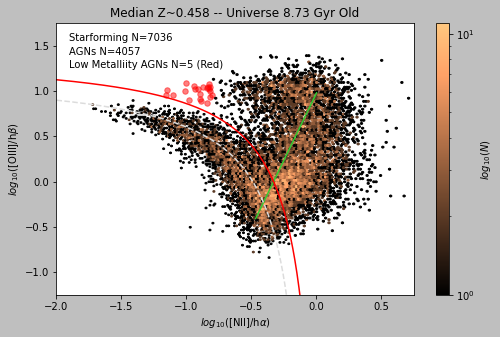

In [16]:
halpha = dfsf['ha'].values
halpha2 = dflowmetagn['ha'].values
halpha3 = dfagn['ha'].values
hbeta = dfsf['hb'].values
hbeta2 = dflowmetagn['hb'].values
hbeta3 = dfagn['hb'].values
nii = dfsf['n2'].values
nii2 = dflowmetagn['n2'].values
nii3 = dfagn['n2'].values
oiii = dfsf['o3'].values
oiii2 = dflowmetagn['o3'].values
oiii3 = dfagn['o3'].values

plot_bpt(nii, halpha, oiii, hbeta, nii2, halpha2, oiii2, hbeta2, nii3, halpha3, oiii3, hbeta3, alpha = .5)

In [21]:
def groves_1():
    x = np.linspace(-2, 2, 500)
    y = 2.1*x + 0.85
    return [x, y]

def groves_2():
    x = np.linspace(-2, 2, 500)
    y = -1.2*x - 0.7
    return [x, y]

In [22]:
def plot_bpt_1(nii,oii,oiii,nii2,oii2,oiii2,nii3,oii3,oiii3,fig=None,**kwargs):
    oii=np.array(oii,dtype=float)
    oii2=np.array(oii2,dtype=float)
    oii3=np.array(oii3, dtype=float)
    nii=np.array(nii,dtype=float)
    nii2=np.array(nii2,dtype=float)
    nii3=np.array(nii3,dtype=float)
    oiii=np.array(oiii,dtype=float)
    oiii2=np.array(oiii2,dtype=float)
    oiii3=np.array(oiii3,dtype=float)
    n2o2=np.log10(nii/oii)
    o3o2=np.log10(oiii/oii)
    n2o22=np.log10(nii2/oii2)
    o3o22=np.log10(oiii2/oii2)
    n2o23=np.log10(nii3/oii3)
    o3o23=np.log10(oiii3/oii3)
    
    plt.style.use('grayscale')
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    
    starform = ax.hexbin(n2o2, o3o2, gridsize = 100, cmap = "copper", bins = "log", mincnt = 1)
    low_met_agn = plt.scatter(n2o22,o3o22, c='r', s=30, **kwargs)
    agn = ax.hexbin(n2o23, o3o23, gridsize = 100, cmap = "winter", bins = "log", mincnt = 1)
    
    plt.plot(groves_1()[0], groves_1()[1], c='black')
    plt.plot(groves_2()[0], groves_2()[1], c='black')
    
    cb = fig.colorbar(agn, ax=ax)
    cb2 = fig.colorbar(starform, ax=ax)
    cb.set_label(r'$log_{10}(N)$ (AGNs)')
    cb2.set_label(r'$log_{10}(N)$ (Starforming)')
    
    plt.xlim(-1.75,1.0)
    plt.ylim(-1.25,1.75)
    plt.title('Median Z~0.458 -- Universe 8.73 Gyr Old')
    plt.xlabel(r'$log_{10}($[NII]/$[OII])$')
    plt.ylabel(r'$log_{10}($[OIII]/$[OII])$')
    plt.show()
    return

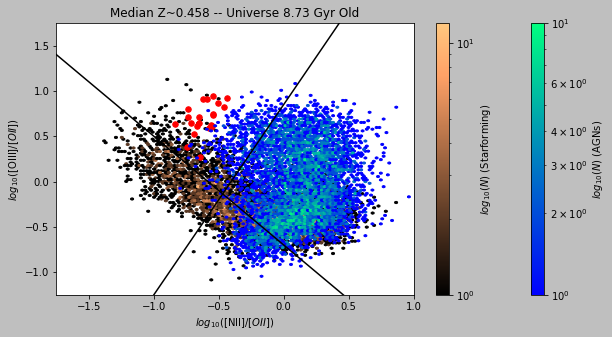

In [23]:
oii = dfsf['o2'].values
oii2 = dflowmetagn['o2'].values
oii3 = dfagn['o2'].values
nii = dfsf['n2'].values
nii2 = dflowmetagn['n2'].values
nii3 = dfagn['n2'].values
oiii = dfsf['o3'].values
oiii2 = dflowmetagn['o3'].values
oiii3 = dfagn['o3'].values

plot_bpt_1(nii, oii, oiii, nii2, oii2, oiii2, nii3, oii3, oiii3, alpha = 1.0)